In [6]:
from data import load_data, GS_Dataset, make_gs_dataset
from model import Narx, DEVICE
from util_fun import train_narx_simval, narx_sim_nrms
import torch
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split



In [7]:
n_a=6
n_b=25
n_layers=5
n_nodes=50
n_epochs=15000

In [8]:
model=Narx(n_a+n_b,n_nodes, n_layers).to(DEVICE)

In [9]:
x_data, y_data= load_data()
data = make_gs_dataset(x_data, y_data, n_a, n_b, DEVICE)

In [11]:
results = train_narx_simval(model, n_a, n_b, data, n_epochs=n_epochs)

Checkpoint at epoch 1:  

current best pred NRMS: 1.2973593799462249, previous best pred NRMS: inf 

current best sim NRMS: 1.7176228086305008, previous best sim NRMS: inf 

Checkpoint at epoch 601:  

current best pred NRMS: 0.4045313032173588, previous best pred NRMS: 1.2973593799462249 

current best sim NRMS: 1.2867144670326385, previous best sim NRMS: 1.7176228086305008 

Checkpoint at epoch 1201:  

current best pred NRMS: 0.371013725837812, previous best pred NRMS: 0.4045313032173588 

current sim NRMS: 1.359148747791465, current best sim NRMS: 1.2867144670326385 

Checkpoint at epoch 1801:  

current best pred NRMS: 0.3438139659555476, previous best pred NRMS: 0.371013725837812 

current sim NRMS: 1.8503278384524122, current best sim NRMS: 1.2867144670326385 

Checkpoint at epoch 2401:  

current best pred NRMS: 0.33736852062711875, previous best pred NRMS: 0.3438139659555476 

current sim NRMS: 1.80280861962839, current best sim NRMS: 1.2867144670326385 

Checkpoint at epoch 3

KeyboardInterrupt: 

In [ ]:
torch.save(results.best_sim_model.state_dict(), 'narx15K_na6_nb25_nlay5_nnode50_sim')

In [ ]:
_,y_true,ylist,nrms=narx_sim_nrms(model, n_a, n_b, data.x_data_val, data.y_data_val, True, DEVICE, 5000)
f'{nrms:.2%}'

'6.24%'

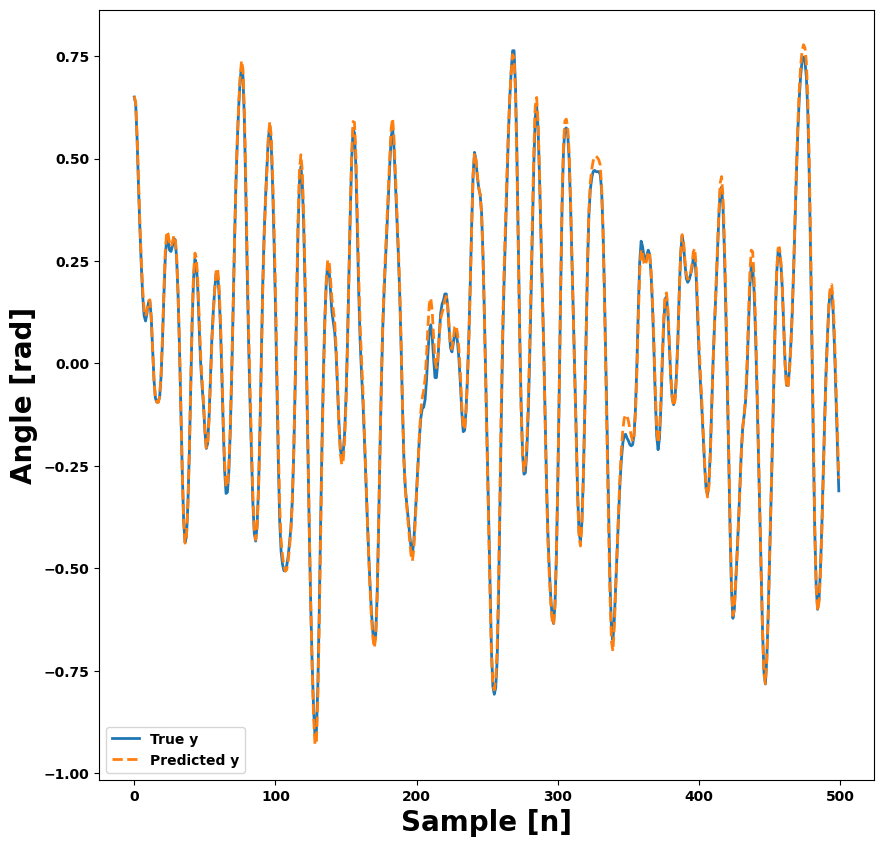

In [ ]:
start=0
end=500
fs=20
plt.figure(figsize=(10,10))
plt.plot(y_true[start:end], label='True y', lw=2)
plt.plot(ylist[start:end], label='Predicted y', ls='--', lw=2)
plt.legend()
plt.xlabel('Sample [n]',fontsize=fs)
plt.ylabel('Angle [rad]',fontsize=fs)
plt.savefig('narx_pred_v_true.svg')
plt.savefig('narx_pred_v_true.png')